El hamiltoniano para dos masas acopladas por medio de tres resortes estáá dado por,

$$ H = \frac{1}{2m}p_1^2 + \frac{1}{2m}p_2^2 +\frac{1}{2}k_1x_1^2 + \frac{1}{2} k_3x_2^2 + \frac{1}{2} k_2 (x_2 - x_1)^2 $$

Por consiguiente las ecuaciones de movimento serán:

\begin{align}
\dot{p}_1 & = - \frac{\partial H}{\partial x_1} = - k_1 x_1 + k_2(x_2 - x_1) \\
\dot{p}_2 & = - \frac{\partial H}{\partial x_2} = -k_3 x_2 - k_2 ( x_2 - x_1) \\
\dot{q}_0 = \dot{x}_1 & = \frac{\partial H}{\partial p_1} = \frac{p_1}{m_1} \\
\dot{q}_1 = \dot{x}_2 & = \frac{\partial H}{\partial p_2} = \frac{p_2}{m_2}
\end{align}


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [0]:
k1 = 1.0
k2 = 1.0
k3 = 1.0
m1 = 1.0
m2 = 1.0

def Q_Dot(f):
  x1, x2 = f[0],f[1]
  p1, p2 = f[2], f[3]
  x1_dot = p1/m1
  x2_dot= p2/m2
  p1_dot = - k1*x1 + k2*( x2 - x1 )
  p2_dot =  - k3*x2 - k2*( x2 - x1 )
  return np.asarray([x1_dot,x2_dot,p1_dot,p2_dot])

In [0]:
def paso_euler(f,t_n,y_n,dt):
  y_dot = f(t_n,y_n) 
  y_n_mas_1 = y_n +dt*y_dot
  return y_n_mas_1

def campo_vectorial(f, t, y_0, dt):
  tiempo = time.time()

  t_0, t_f = t
  n = int((t_f - t_0)/dt)
  d = len(y_0)
  y_tray = np.zeros(((n+1),d))
  t = np.linspace(t_0,t_f,n+1)
  y_tray[0,:] = y_0

  tiempo = time.time() - tiempo
  
  for i in range(n):
    y_tray[i+1,:] = paso_euler(f,t[i],y_tray[i,:],dt)

  print('Parámetros (constantes de resortes): k1 = ' + str(k1) + ' k2 = ' + str(k2) + ' k3 = ' + str(k3))
  print('Parámetros (masas): m1 = ' + str(m1) + ' m2 = ' + str(m2))
  print('Tiempo de computo = ' + ('%.5f' %tiempo) + 's')
    
  return t, y_tray

def Q_dot_t(t,y):
    return Q_Dot(y)

Parámetros (constantes de resortes): k1 = 1.0 k2 = 1.0 k3 = 1.0
Parámetros (masas): m1 = 1.0 m2 = 1.0
Tiempo de computo = 0.00161s


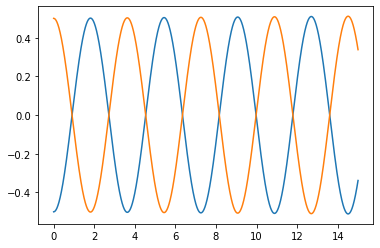

In [0]:
t, Q_Traj = campo_vectorial(Q_dot_t,[0,15],[-0.5,0.5,0.,0],0.001)

plt.plot(t,Q_Traj[:,0]) 
plt.plot(t,Q_Traj[:,1])

## Distinos parámetros y condiciones inciales.

Parámetros (constantes de resortes): k1 = 0.3 k2 = 0.9 k3 = 1.0
Parámetros (masas): m1 = 1.0 m2 = 2.0
Tiempo de computo = 0.00049s


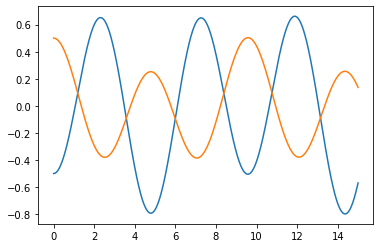

In [0]:
# Mismas condiciones iniciales, distintos parámetros
k1=0.3
k2 = 0.9
k3 = 1.0
m1 = 1.0
m2 = 2.0

t, Q_Traj = campo_vectorial(Q_dot_t,[0,15],[-0.5,0.5,0.,0],0.001)

plt.plot(t,Q_Traj[:,0])
plt.plot(t,Q_Traj[:,1])

Parámetros (constantes de resortes): k1 = 1.0 k2 = 1.0 k3 = 1.0
Parámetros (masas): m1 = 1.0 m2 = 1.0
Tiempo de computo = 0.00022s


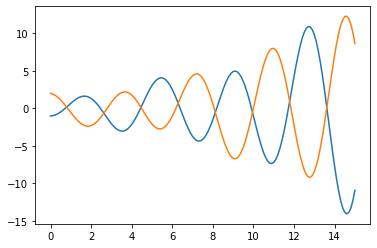

In [0]:
# Mismos parámetros, distintas condiciones inciales
k1=1.0
k2 = 1.0
k3 = 1.0
m1 = 1.0
m2 = 1.0

t, Q_Traj = campo_vectorial(Q_dot_t,[0,15],[-1,2,0.3,-0.8],0.1)

plt.plot(t,Q_Traj[:,0])
plt.plot(t,Q_Traj[:,1])

Parámetros (constantes de resortes): k1 = 0.9 k2 = 3.0 k3 = 0.1
Parámetros (masas): m1 = 5.0 m2 = 8.0
Tiempo de computo = 0.00023s


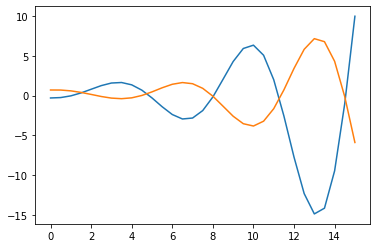

In [0]:
# Distintas condiciones y parámetros
k1=0.9
k2 = 3.0
k3 = 0.1
m1 = 5.0
m2 = 8.0

t, Q_Traj = campo_vectorial(Q_dot_t,[0,15],[-0.3,0.7,0.5,-0.1],0.5)

plt.plot(t,Q_Traj[:,0])
plt.plot(t,Q_Traj[:,1])

## Calcular la energía del sistema en cada paso de tiempo y verificar que se conserva.

In [0]:
def energy(f,t):
  x1, x2 = f[0],f[1]
  p1, p2 = f[2], f[3]
  tiempo = []
  T = []
  V = []
  E = []
  for i in range (t):
    tiempo.append(i)
    T.append(p1/m1 + p2/m2)
    V.append((1/2)*k1*x1**2 + (1/2)*(x2-x1)**2 + (1/2)*k3*x2**2)
    e = T[i]+V[i] #Energía cinética más potencial
    E.append(e) #Energía total
  return E

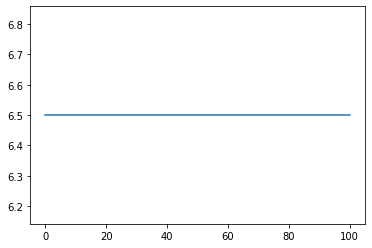

In [0]:
k1=1.0
k2 = 1.0
k3 = 1.0
m1 = 1.0
m2 = 1.0

plt.plot(np.linspace(0,len(energy([-1,2,0.3,-0.8],100)),100),energy([-1,2,0.3,-0.8],100))

Como se aprecia en la figura anterior, la energía se conserva para cualquier tiempo t.

El hamiltoniano para *n* masas acopladas por medio de tres resortes está dado por,

$$ H = \frac{1}{2m}p_1^2 + \ldots + \frac{1}{2m}p_n^2 +\frac{1}{2}k_1x_1^2 + \ldots + \frac{1}{2} k_i (x_i - x_{i-1})^2 + \ldots + \frac{1}{2}k_nx_n^2$$

Por consiguiente las ecuaciones de movimento serán:

\begin{align}
\dot{p}_1 & = - \frac{\partial H}{\partial x_1} = - k_1 x_1 + k_2(x2-x1) \\ 
\dot{p}_2 & = - \frac{\partial H}{\partial x_2} = -k_2(x_2 -x_1) + k_3 ( x_3 - x_2) \\ \vdots & \\
\dot{p}_{i-1} & = - \frac{\partial H}{\partial x_{i-1}} = -k_{i-1}(x_{i-1} -x_{i-2}) + k_{i}( x_{i} - x_{i-1}) \\
\dot{p}_{i} & = - \frac{\partial H}{\partial x_i} = -k_{i}(x_{i} -x_{i-1}) + k_{i+1}( x_{i+1} - x_{i}) \\ \vdots  \\ 
\dot{p}_n & = - \frac{\partial H}{\partial x_n} = - k_{n} x_{n} + k_{n-1}(x_{n-1}-x_{n-2}) \\ \\
\dot{q}_0 = \dot{x}_1 & = \frac{\partial H}{\partial p_1} = \frac{p_1}{m_1} \\ \\
\dot{q}_1 = \dot{x}_2 & = \frac{\partial H}{\partial p_2} = \frac{p_2}{m_2} \\ \vdots & \\
\dot{q}_{n-1} = \dot{x}_n & = \frac{\partial H}{\partial p_n} = \frac{p_n}{m_n}
\end{align}

In [0]:
# Masas y constantes de resortes iguales.
m = 1.0
k = 1.0

# Grados de libertad vectorizados.
X = []
P = []
X_DOT = []
P_DOT = []

n = int(input('Dame el número de masas acopladas en el sistema unidimensional: '))

# Condiciones inciales
Cx = []
Cp = []
C = []
print('Condiciones iniciales en la posicisión')
for t in range (1,int(n)+1):
  Cx.append(float(input('Dame la posición inicial de la masa '+str(t)+' :')))
print('Condiciones iniciales de los momentos lineales p')
for T in range (1,int(n)+1):
  Cp.append(float(input('Dame el momento incial de la masa '+str(T)+' :')))
u = Cx + Cp
C = np.array(u)

def Q_DOT(f):
  for i in range (int(n)):
    X.append(float(f[i]))
  for j in range (int(n),2*int(n)):
    P.append(float(f[j]))
  for l in range (int(n)):
    X_DOT.append(float(P[l]/m))
  for q in range (int(n)):
    if q == 0:
      P_DOT.append(float(k*(X[q])))
    elif q>0 and q<int(n):
      P_DOT.append(float(k*(X[q-1]+X[q])))
    else:
      P_DOT.append(float(k*(X[q])))
  return X_DOT+P_DOT

Dame el número de masas acopladas en el sistema unidimensional: 2
Condiciones iniciales en la posicisión
Dame la posición inicial de la masa 1 :-0.5
Dame la posición inicial de la masa 2 :0.5
Condiciones iniciales de los momentos lineales p
Dame el momento incial de la masa 1 :0
Dame el momento incial de la masa 2 :0


In [0]:
def paso_euler2(f,t_n,y_n,dt):
  y_dot = f(t_n,y_n)
  print(' f(t_n,y_n) : ',  f(t_n,y_n))
  print('y_dot : ', y_dot)
  print('y_n : ', y_n)
  
  y_n_mas_1 =y_n +  dt*y_dot
  return y_n_mas_1

def campo_vectorial2(f, t, y_0, dt):
  tiempo = time.time()

  t_0, t_f = t
  n = int((t_f - t_0)/dt)
  d = len(y_0)
  y_tray = np.zeros(((n+1),d))
  t = np.linspace(t_0,t_f,n+1)
  y_tray[0,:] = y_0

  tiempo = time.time() - tiempo
  
  for i in range(n):
    y_tray[i+1,:] = paso_euler2(f,t[i],y_tray[i,:],dt)

  print('Parámetros (constantes de resortes): k1 = ' + str(k1) + ' k2 = ' + str(k2) + ' k3 = ' + str(k3))
  print('Parámetros (masas): m1 = ' + str(m1) + ' m2 = ' + str(m2))
  print('Tiempo de computo = ' + ('%.5f' %tiempo) + 's')
    
  return t, y_tray

def Q_DOT_T(t,y):
    return Q_DOT(y)

In [0]:
# t, Q_Traj = campo_vectorial(Q_DOT_T,[0,15],[-0.5,0.5,0.,0],0.001)
t, Q_Traj = campo_vectorial2(Q_DOT_T,[0,15],C,0.001)

plt.plot(t,Q_Traj[:,0])
plt.plot(t,Q_Traj[:,1])

 f(t_n,y_n) :  [0.0, 0.0, 0.0, 0.0, -0.5, 0.0, -0.5, 0.0]
y_dot :  [0.0, 0.0, -0.5, 0.0]
y_n :  [-0.5  0.5  0.   0. ]


TypeError: ignored